In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


character(0)

**Project Overview**

*In this project, we aim to predict whether a person has diabetes based on their medical information. We will cover the following steps:Loading the dataset: Import the necessary dataset and libraries.Exploratory Data Analysis (EDA): Understand the dataset by visualizing distributions and correlations.Preprocessing: Handle missing values, normalize features and split the dataset into training and testing sets.Training the model: Build and train a Logistic Regression model for diabetes prediction.Evaluating the model: Use accuracy, precision, recall and other metrics to assess the model's performance.Making predictions: Apply the model to predict the risk of diabetes for new data.*


In [6]:
library(readr)
library(caTools)
library(caret)
library(e1071)

data <- read.csv("/kaggle/input/diabetes-dataset/diabetes.csv")
head(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


This dataset contains eight features, each of which determines a result of 0 or 1. 0 means the patient does not have diabetes, whereas a score of 1 means they do.

**Data Preprocessing**
> In this step, we preprocess the data by handling missing values, scaling features, and splitting the dataset:

* Checked for missing values using summary statistics.
* Separated features (X) and target variable (y).
* Scaled only the features to standardize their values (mean = 0, SD = 1).
* Recombined scaled features with the target to form the final dataset. 
* Split data into training (70%) and testing (30%) sets using a fixed random seed for reproducibility.


In [7]:
summary(data)

colSums(is.na(data))

X <- data[, 1:8]
y <- data[, 9]

scaled_X <- as.data.frame(scale(X))

scaled_data <- cbind(scaled_X, y)

X <- scaled_data[, 1:8]
y <- scaled_data[, 9]

set.seed(123)
sample <- sample.split(y, SplitRatio = 0.7)
X_train <- X[sample == TRUE, ]
y_train <- y[sample == TRUE]
X_test <- X[sample == FALSE, ]
y_test <- y[sample == FALSE]

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0

We ensured that the dataset was clean by checking for missing values and scaling the columns. We then split the data into training and testing sets for later evaluation.

# ****Exploratory Data Analysis (EDA)****
Now we will create some visualization for this dataset to explore our dataset.

** **3.1 Correlation Heatmap** **
* We will visualize the correlations between various features using a correlation heatmap. This will help us understand the relationships between different variables in the dataset.


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




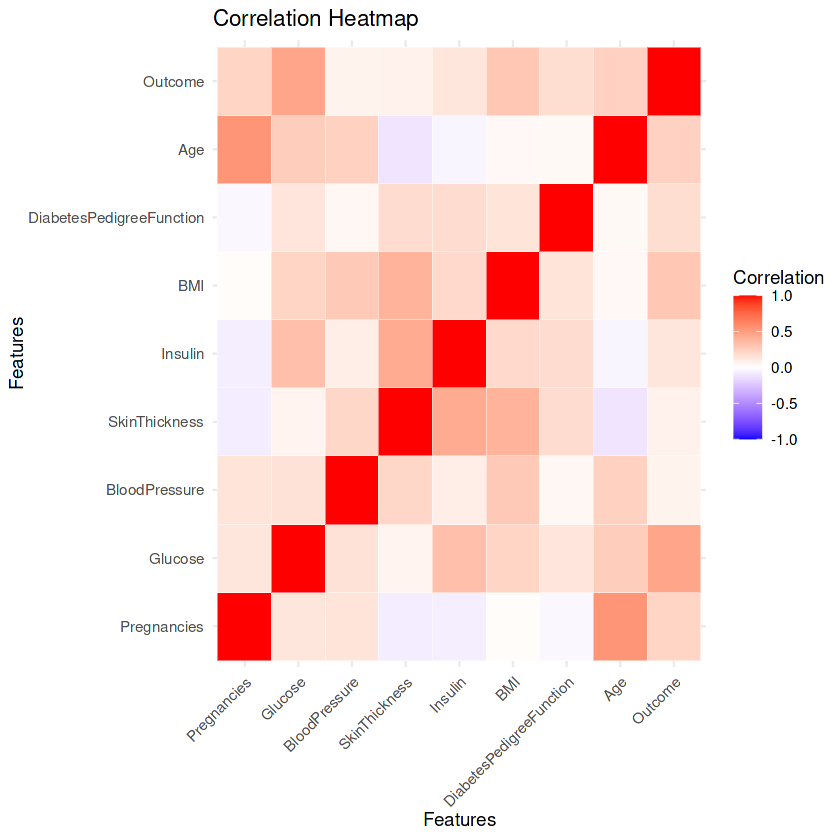

In [8]:
library(ggplot2)
library(reshape2)

correlation_matrix <- cor(data)

correlation_melted <- melt(correlation_matrix)

ggplot(correlation_melted, aes(Var1, Var2, fill=value)) +
  geom_tile(color="white") +
  scale_fill_gradient2(low="blue", high="red", mid="white", midpoint=0, 
                       limit=c(-1,1), space="Lab", name="Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title="Correlation Heatmap", x="Features", y="Features")

**3.2 Distribution of Diabetes Outcomes**
* Now, we will visualize the distribution of the Outcome variable (whether or not a person has diabetes).

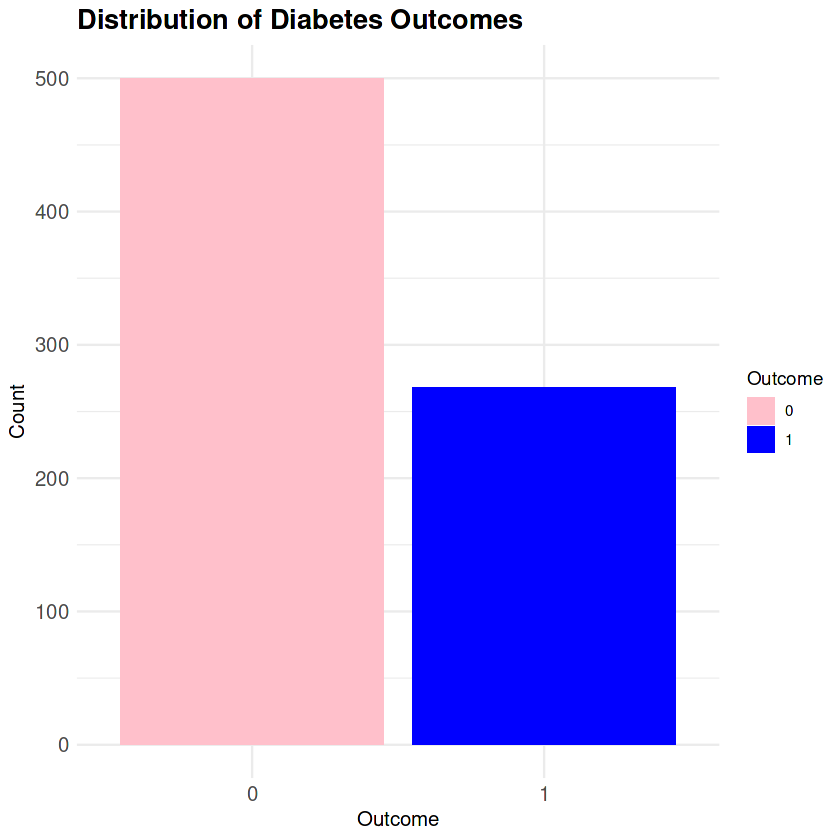

In [10]:
ggplot(outcome_df, aes(x=Outcome, y=Count, fill=Outcome)) +
  geom_bar(stat="identity") +
  scale_fill_manual(values=c("0"="pink", "1"="blue")) +  # adjust to your Outcome levels
  labs(title="Distribution of Diabetes Outcomes", x="Outcome", y="Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(size=12),
        axis.text.y = element_text(size=12),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold"))


This bar plot shows the distribution of Outcome classes (0 for no diabetes and 1 for diabetes), helping us understand the balance between classes.

**3.3 Histograms with Outcome Split**
* Next, we'll plot histograms for various features, split by the Outcome class, to understand how the distribution of each feature varies between diabetic and non-diabetic individuals.

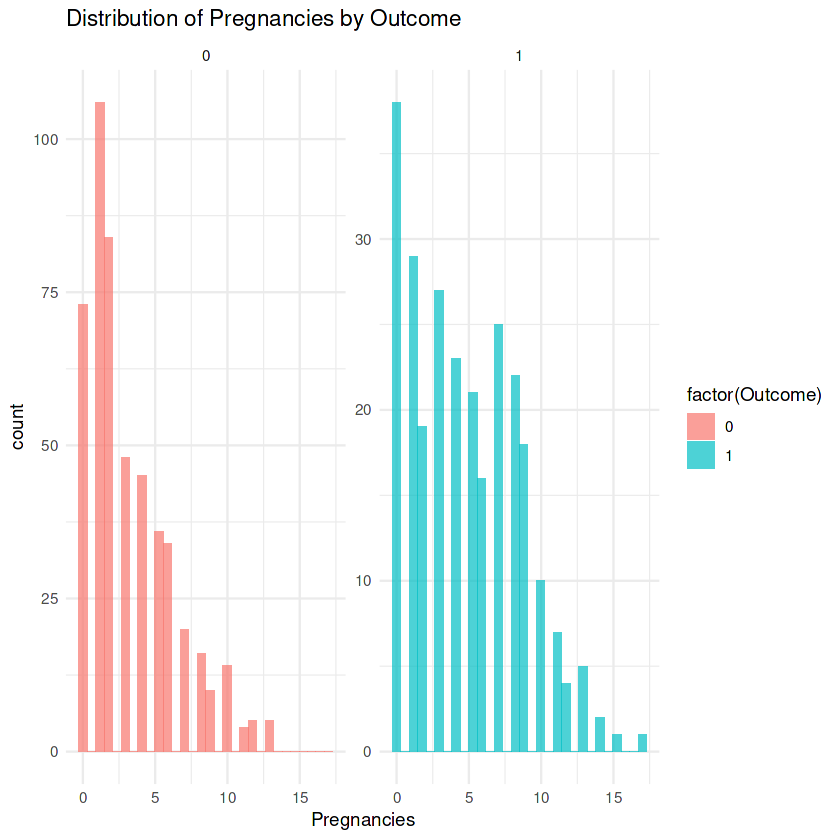

In [11]:
library(ggplot2)

diabetes_subset <- data[, c("Pregnancies", "Glucose", "BloodPressure", 
                                "BMI", "Age", "Outcome")]

ggplot(diabetes_subset, aes(x = Pregnancies, fill = factor(Outcome))) +
  geom_histogram(position = "identity", bins = 30, alpha = 0.7) +
  labs(title = "Distribution of Pregnancies by Outcome") +
  facet_wrap(~Outcome, scales = "free_y") +
  theme_minimal()

We visualized the distribution of Pregnancies with respect to the Outcome to identify patterns between the feature and the target variable.

**3.4 Boxplot for BMI by Outcome**
* To understand the distribution of BMI for both diabetic and non-diabetic individuals, we can plot a boxplot.

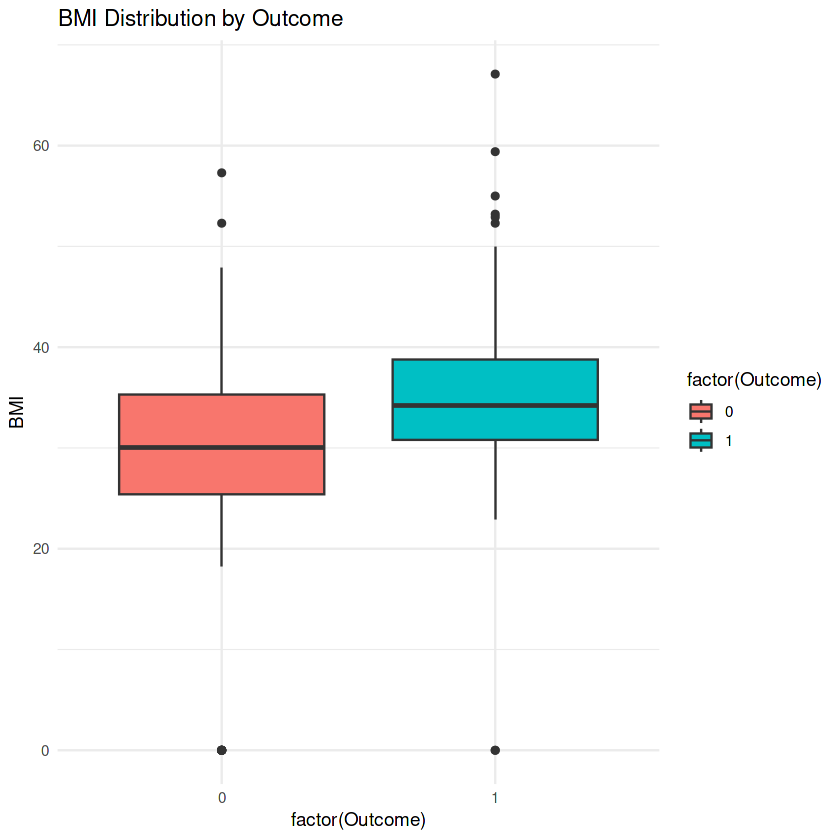

In [12]:
library(ggplot2)

ggplot(data, aes(x = factor(Outcome), y = BMI, fill = factor(Outcome))) +
  geom_boxplot() +
  labs(title = "BMI Distribution by Outcome") +
  theme_minimal()

This boxplot shows how BMI varies for individuals with and without diabetes. It helps to identify if there's a noticeable difference in BMI between the two classes.

**4. Building the Model**
* Now, we will build a Logistic Regression model to predict diabetes based on medical features.

In [13]:
log_model <- glm(y_train ~ ., data = X_train, family = binomial)

summary(log_model)


Call:
glm(formula = y_train ~ ., family = binomial, data = X_train)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -0.8521     0.1185  -7.192 6.38e-13 ***
Pregnancies                0.3455     0.1354   2.551   0.0107 *  
Glucose                    1.4154     0.1592   8.892  < 2e-16 ***
BloodPressure             -0.2875     0.1364  -2.108   0.0350 *  
SkinThickness              0.1272     0.1404   0.906   0.3649    
Insulin                   -0.3864     0.1447  -2.669   0.0076 ** 
BMI                        0.7028     0.1496   4.699 2.61e-06 ***
DiabetesPedigreeFunction   0.2759     0.1279   2.158   0.0309 *  
Age                        0.1921     0.1392   1.380   0.1675    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 696.28  on 537  degrees of freedom
Residual deviance: 477.81  on 529  degrees of freedom
AIC: 495.81

Number of

**5. Evaluating the Model**
* To evaluate the model, we will calculate various performance metrics like accuracy, precision, recall, and F1 score using the test data.

In [14]:
predictions <- predict(log_model, newdata = X_test, type = "response")

predictions <- factor(ifelse(predictions > 0.5, 1, 0), 
                      levels = levels(as.factor(y_test)))

confusionMatrix(predictions, as.factor(y_test))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 127  37
         1  23  43
                                          
               Accuracy : 0.7391          
                 95% CI : (0.6773, 0.7946)
    No Information Rate : 0.6522          
    P-Value [Acc > NIR] : 0.002949        
                                          
                  Kappa : 0.4005          
                                          
 Mcnemar's Test P-Value : 0.093290        
                                          
            Sensitivity : 0.8467          
            Specificity : 0.5375          
         Pos Pred Value : 0.7744          
         Neg Pred Value : 0.6515          
             Prevalence : 0.6522          
         Detection Rate : 0.5522          
   Detection Prevalence : 0.7130          
      Balanced Accuracy : 0.6921          
                                          
       'Positive' Class : 0               
                              

**6. Making Predictions using the Model**
* We will now use the trained model to predict the likelihood of diabetes for a new patient based on their medical data. This function allows us to predict diabetes risk for a new patient by entering their medical parameters. The prediction is based on the trained logistic regression model.

In [15]:
predict_diabetes <- function(pregnancies, glucose, bloodpressure, skinthickness, 
                             insulin, bmi, diabetespedigreefunction, age) {
  input_data <- data.frame(
    Pregnancies = pregnancies,
    Glucose = glucose,
    BloodPressure = bloodpressure,
    SkinThickness = skinthickness,
    Insulin = insulin,
    BMI = bmi,
    DiabetesPedigreeFunction = diabetespedigreefunction,
    Age = age
  )
  input <- as.data.frame(input_data)
  prediction <- predict(log_model, newdata = input, type = "response")
  prediction <- factor(ifelse(prediction > 0.5, 1, 0), 
                       levels = levels(as.factor(prediction)))
  
  return(prediction)
}

new_patient <- data.frame(
  pregnancies = 6,
  glucose = 148,
  bloodpressure = 72,
  skinthickness = 35,
  insulin = 0,
  bmi = 33.6,
  diabetespedigreefunction = 0.627,
  age = 50
)

prediction <- predict_diabetes(
  new_patient$pregnancies,
  new_patient$glucose,
  new_patient$bloodpressure,
  new_patient$skinthickness,
  new_patient$insulin,
  new_patient$bmi,
  new_patient$diabetespedigreefunction,
  new_patient$age
)

if (any(prediction == 1)) {
  cat("Based on the model's prediction, there is a higher chance of diabetes.")
} else {
  cat("Based on the model's prediction, the risk of diabetes appears lower.")
}

Based on the model's prediction, there is a higher chance of diabetes.

# Conclusion
From our analysis, we:


* Explored the distribution of diabetes outcomes and analyzed key variables such as Glucose and BMI. Conducted exploratory data analysis (EDA) to uncover relationships between features.Built a Logistic Regression model for diabetes prediction with relatively good accuracy, but with room for improvement in recall.
* We concluded that the logistic regression model is effective for predicting diabetes. However, further model optimization and data balancing techniques could improve the recall, making the model more robust in identifying diabetic patients.


This analysis has been done by Kanishka Sejwal